In [1]:
#import libraries
import os
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline



In [2]:
#import csv file
#view data and columns head
full_data = pd.read_csv("acs2017_county_data.csv",delimiter=",")
full_data.head()

,CountyId,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
0,1001,Alabama,Autauga County,55036,26899,28137,2.7,75.4,18.9,0.3,...,0.6,1.3,2.5,25.8,24112,74.1,20.2,5.6,0.1,5.2
1,1003,Alabama,Baldwin County,203360,99527,103833,4.4,83.1,9.5,0.8,...,0.8,1.1,5.6,27.0,89527,80.7,12.9,6.3,0.1,5.5
2,1005,Alabama,Barbour County,26201,13976,12225,4.2,45.7,47.8,0.2,...,2.2,1.7,1.3,23.4,8878,74.1,19.1,6.5,0.3,12.4
3,1007,Alabama,Bibb County,22580,12251,10329,2.4,74.6,22.0,0.4,...,0.3,1.7,1.5,30.0,8171,76.0,17.4,6.3,0.3,8.2
4,1009,Alabama,Blount County,57667,28490,29177,9.0,87.4,1.5,0.3,...,0.4,0.4,2.1,35.0,21380,83.9,11.9,4.0,0.1,4.9


In [3]:
#overview of data 
full_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3220 entries, 0 to 3219
Data columns (total 37 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CountyId          3220 non-null   int64  
 1   State             3220 non-null   object 
 2   County            3220 non-null   object 
 3   TotalPop          3220 non-null   int64  
 4   Men               3220 non-null   int64  
 5   Women             3220 non-null   int64  
 6   Hispanic          3220 non-null   float64
 7   White             3220 non-null   float64
 8   Black             3220 non-null   float64
 9   Native            3220 non-null   float64
 10  Asian             3220 non-null   float64
 11  Pacific           3220 non-null   float64
 12  VotingAgeCitizen  3220 non-null   int64  
 13  Income            3220 non-null   int64  
 14  IncomeErr         3220 non-null   int64  
 15  IncomePerCap      3220 non-null   int64  
 16  IncomePerCapErr   3220 non-null   int64  


In [4]:
#filter data to only display California and Washington values
df = full_data[full_data['State'].eq('Washington') | full_data['State'].eq('California')].copy()
df.nunique()

CountyId            97
State                2
County              97
TotalPop            97
Men                 97
Women               97
Hispanic            83
White               96
Black               43
Native              37
Asian               56
Pacific             12
VotingAgeCitizen    97
Income              97
IncomeErr           95
IncomePerCap        97
IncomePerCapErr     94
Poverty             75
ChildPoverty        86
Professional        77
Service             67
Office              60
Construction        77
Production          61
Drive               74
Carpool             60
Transit             45
Walk                49
OtherTransp         36
WorkAtHome          56
MeanCommute         76
Employed            97
PrivateWork         77
PublicWork          81
SelfEmployed        62
FamilyWork          13
Unemployment        54
dtype: int64

In [5]:
#review ca data details
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 97 entries, 186 to 2991
Data columns (total 37 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CountyId          97 non-null     int64  
 1   State             97 non-null     object 
 2   County            97 non-null     object 
 3   TotalPop          97 non-null     int64  
 4   Men               97 non-null     int64  
 5   Women             97 non-null     int64  
 6   Hispanic          97 non-null     float64
 7   White             97 non-null     float64
 8   Black             97 non-null     float64
 9   Native            97 non-null     float64
 10  Asian             97 non-null     float64
 11  Pacific           97 non-null     float64
 12  VotingAgeCitizen  97 non-null     int64  
 13  Income            97 non-null     int64  
 14  IncomeErr         97 non-null     int64  
 15  IncomePerCap      97 non-null     int64  
 16  IncomePerCapErr   97 non-null     int64  
 17  

In [6]:
#clean time check for duplicated data
df.duplicated()

    

186     False
187     False
188     False
189     False
190     False
        ...  
2987    False
2988    False
2989    False
2990    False
2991    False
Length: 97, dtype: bool

In [7]:
#remove un-needed columns
df.drop(['Poverty','CountyId','IncomePerCap', 'IncomePerCapErr','Professional',
       'ChildPoverty','Service', 'Office', 'Construction','VotingAgeCitizen',
       'Production', 'Drive', 'Carpool', 'Transit', 'Walk', 'OtherTransp',
       'WorkAtHome', 'MeanCommute','PrivateWork', 'PublicWork',
       'SelfEmployed', 'FamilyWork', 'Unemployment','Hispanic','White',
       'Black','Native','Asian','Pacific','IncomeErr','Employed'], axis=1,inplace=True)

In [8]:
#check that dataset is accurate
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 97 entries, 186 to 2991
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   State     97 non-null     object
 1   County    97 non-null     object
 2   TotalPop  97 non-null     int64 
 3   Men       97 non-null     int64 
 4   Women     97 non-null     int64 
 5   Income    97 non-null     int64 
dtypes: int64(4), object(2)
memory usage: 5.3+ KB


In [9]:
#check if unique values
df.nunique()

State        2
County      97
TotalPop    97
Men         97
Women       97
Income      97
dtype: int64

In [10]:
#find mean income of each state
ca_mean = df.query('State=="California"')['Income'].mean()
wa_mean = df.query('State=="Washington"')['Income'].mean()

In [11]:
#new column for counties with above state average incomes
df['Target_Income'] = (df['State'] =='California') & (df['Income'] >= ca_mean) | (df['State'] =='Washington') & (df['Income'] >= wa_mean)


In [12]:
#new column for counties with majority men
df['Target_Demo'] = (df['State'] =='California') & (df['Men'] >= df['Women']) | (df['State'] =='Washington') & (df['Men'] >= df['Women'])

In [13]:
#change boolean value to int
df['Target_Income'] = df['Target_Income'].astype(int)
#check 
df.head()

,State,County,TotalPop,Men,Women,Income,Target_Income,Target_Demo
186,California,Alameda County,1629615,799649,829966,85743,1,False
187,California,Alpine County,1203,664,539,63438,1,True
188,California,Amador County,37306,20005,17301,60636,0,True
189,California,Butte County,225207,111587,113620,46516,0,False
190,California,Calaveras County,45057,22292,22765,54800,0,False


In [14]:
#convert boolean value to int
df['Target_Demo'] = df['Target_Demo'].astype(int)
#check
df.head()

,State,County,TotalPop,Men,Women,Income,Target_Income,Target_Demo
186,California,Alameda County,1629615,799649,829966,85743,1,0
187,California,Alpine County,1203,664,539,63438,1,1
188,California,Amador County,37306,20005,17301,60636,0,1
189,California,Butte County,225207,111587,113620,46516,0,0
190,California,Calaveras County,45057,22292,22765,54800,0,0


In [15]:
#create values for z-test


#num of CA counties with above state average income
cal_income_above = len(df[(df['State'] =='California') & (df['Target_Income'] == True)])
#num of WA counties with above state average income
wash_income_above = len(df[(df['State'] =='Washington') & (df['Target_Income'] == True)])
#num of counties in CA
n_cal = len(df[df['State'] == 'California'] == True)
#num of counties in WA
n_wash = len(df[df['State'] == 'Washington'] == True)

print(cal_income_above,":California Incomes\n",wash_income_above,':Washington Incomes\n',n_cal,':Total CA\n',n_wash,':Total WA')

21 :California Incomes
 14 :Washington Incomes
 58 :Total CA
 39 :Total WA


In [16]:
# ToDo: Complete the sm.stats.proportions_ztest() method arguments
z_score, p_value = sm.stats.proportions_ztest(count=[cal_income_above, wash_income_above],nobs=[n_cal, n_wash], alternative = 'larger')
print(z_score, p_value)

0.03111771794122532 0.48758782981894583


In [17]:
#create dataset with only ideal customer demographics 
df2 = df[df['Target_Demo'].eq(True) & df['Target_Income'].eq(True)].copy()

df2.head()

,State,County,TotalPop,Men,Women,Income,Target_Income,Target_Demo
187,California,Alpine County,1203,664,539,63438,1,1
212,California,Monterey County,433168,221016,212152,63249,1,1
222,California,San Diego County,3283665,1651147,1632518,70588,1,1
223,California,San Francisco County,864263,440633,423630,96265,1,1
225,California,San Luis Obispo County,280119,142182,137937,67175,1,1


In [18]:
df2.sort_values('Income', ascending=False)

,State,County,TotalPop,Men,Women,Income,Target_Income,Target_Demo
228,California,Santa Clara County,1911226,963317,947909,106761,1,1
223,California,San Francisco County,864263,440633,423630,96265,1,1
2983,Washington,Snohomish County,771904,387078,384826,78020,1,1
222,California,San Diego County,3283665,1651147,1632518,70588,1,1
2970,Washington,Kitsap County,258903,132104,126799,68336,1,1
227,California,Santa Barbara County,442996,221955,221041,68023,1,1
225,California,San Luis Obispo County,280119,142182,137937,67175,1,1
187,California,Alpine County,1203,664,539,63438,1,1
212,California,Monterey County,433168,221016,212152,63249,1,1
2955,Washington,Benton County,190529,95438,95091,63001,1,1


In [19]:
#create variables to isolate data by state
cal = df2['State']=='California'
wash = df2['State']=='Washington'
print(sum(cal),sum(wash))

7 5


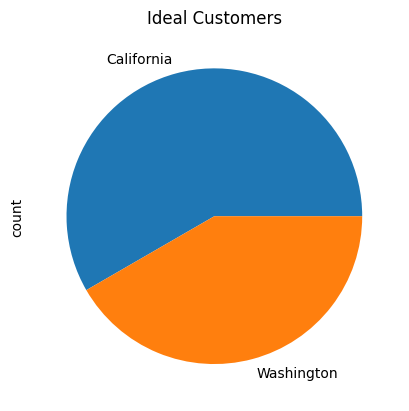

In [20]:
#create pie chart showing state
df2['State'].value_counts().plot(kind='pie', title='Ideal Customers');

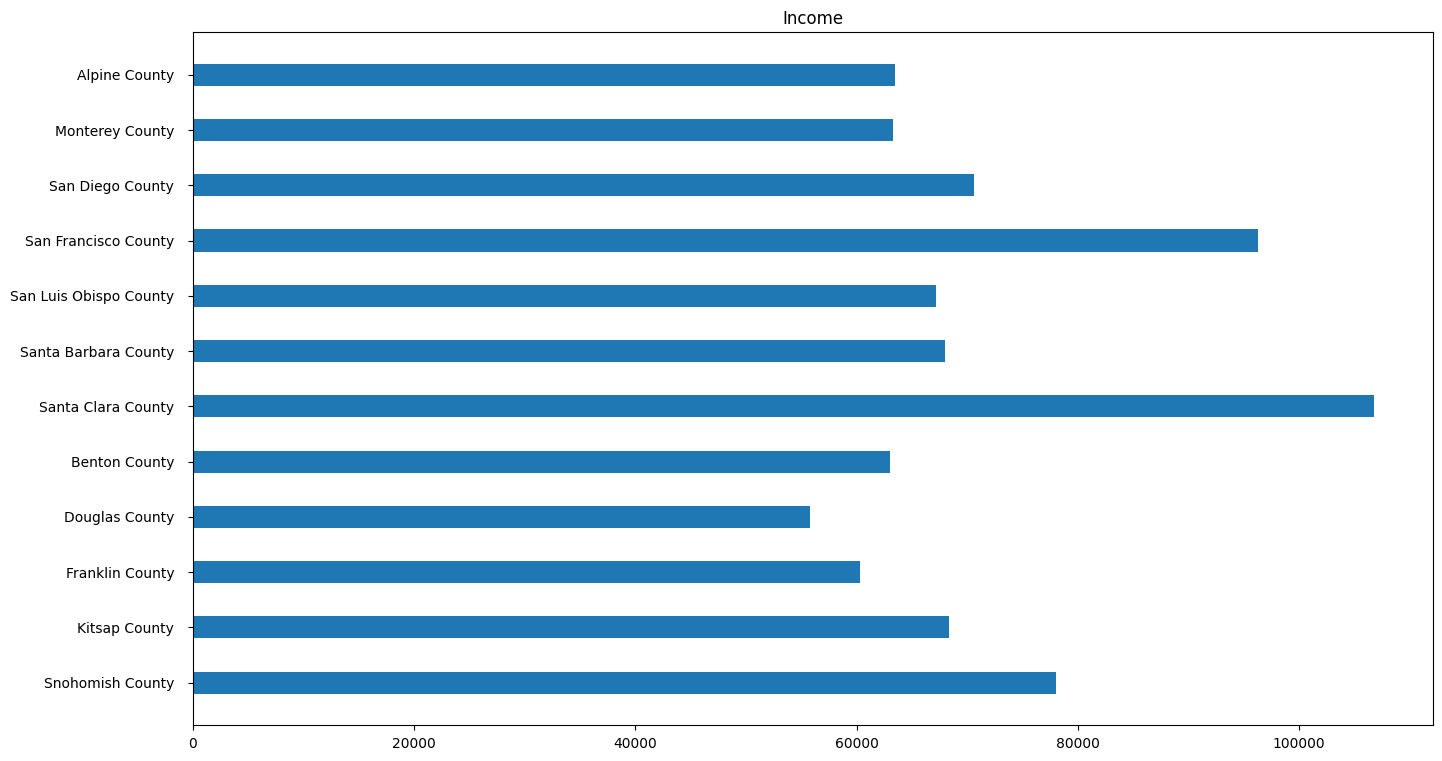

In [21]:
# Figure Size
fig, ax = plt.subplots(figsize =(16, 9))

# Horizontal Bar Plot
ax.barh(df2['County'], df2['Income'],0.4)



# Add padding between axes and labels
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)


# Show top values 
ax.invert_yaxis()
plt.title('Income')

# Show Plot
plt.show()

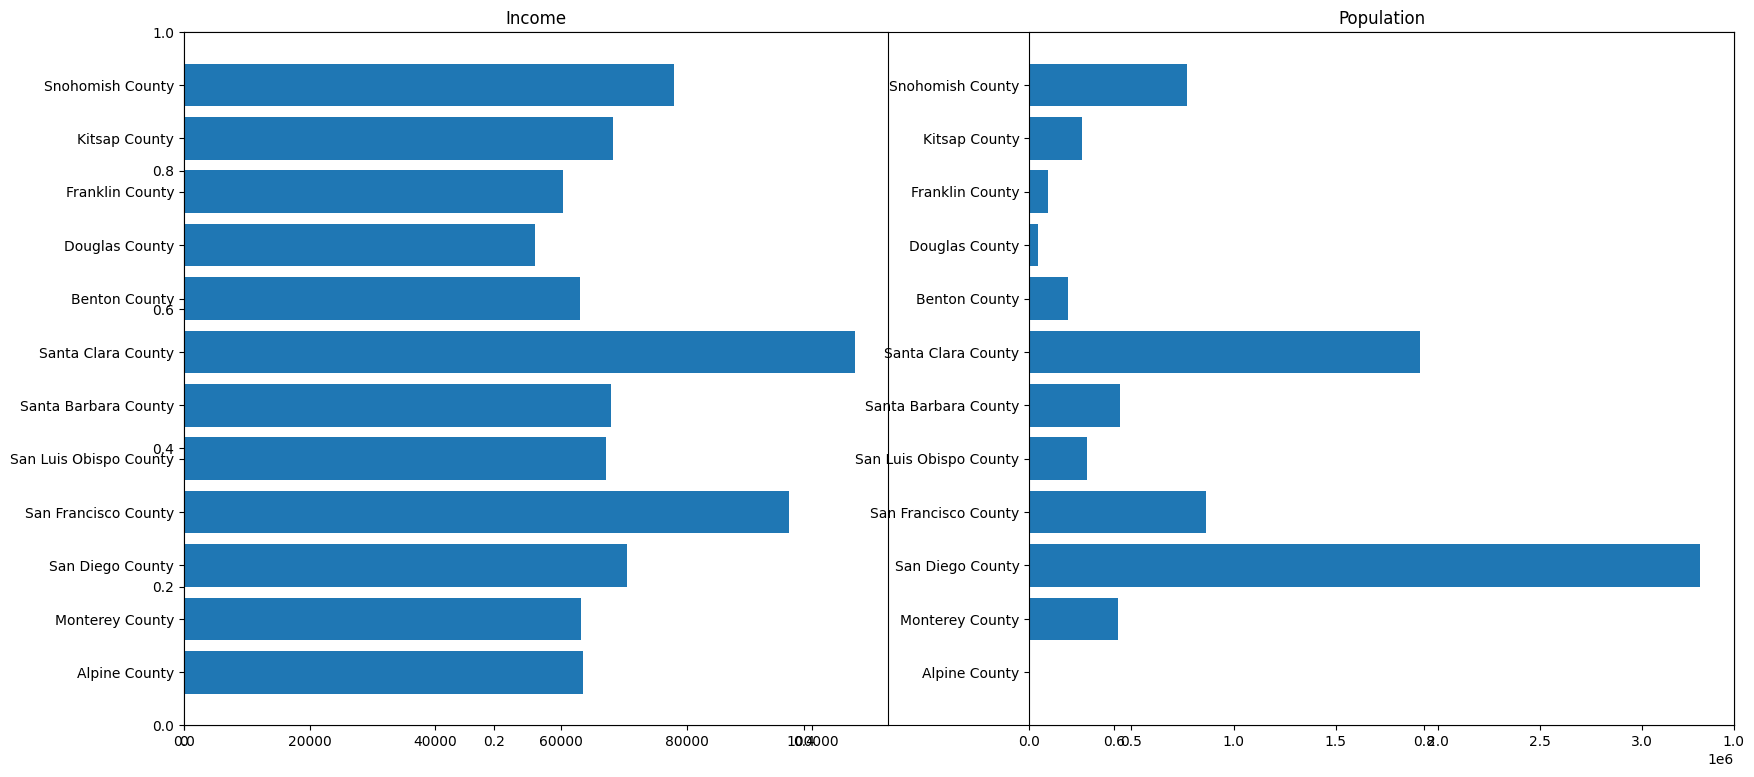

In [22]:
plt.subplots(figsize =(20, 9)) 
#plot 1:
x = df2['County']
y = df2['Income']

plt.subplot(1, 2, 1)
plt.barh(x,y)
plt.title('Income')

#plot 2:
x = df2['County']
y = df2['TotalPop']

plt.subplot(1, 2, 2)
plt.barh(x,y)
plt.title('Population')

plt.show()